# **Automatidata project** -- Linear regression 

### **Task 1. Understand the situation**

*   How can you best prepare to understand and organize the provided taxi cab information? 

### **Task 2a. Build dataframe**
















In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Load dataset into dataframe
df = pd.read_csv('/Users/rufen/Downloads/2017_Yellow_Taxi_Trip_Data.csv')
df.head(100)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20414683,2,03/26/2017 8:06:55 PM,03/26/2017 8:14:43 PM,1,1.46,1,N,186,233,1,7.0,0.5,0.5,1.24,0.0,0.3,9.54
96,63683638,2,07/27/2017 10:10:04 AM,07/27/2017 10:23:13 AM,1,1.66,1,N,163,100,1,10.0,0.0,0.5,1.20,0.0,0.3,12.00
97,105056260,2,12/11/2017 8:04:27 PM,12/11/2017 8:16:10 PM,1,1.63,1,N,161,234,1,9.5,0.5,0.5,2.16,0.0,0.3,12.96
98,97913057,1,11/18/2017 1:04:54 PM,11/18/2017 1:39:53 PM,1,10.00,1,N,230,138,1,34.5,0.0,0.5,7.05,0.0,0.3,42.35


In [4]:
# Pandas display options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)

In [5]:
df.isna().mean()

Unnamed: 0               0.0
VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
dtype: float64

In [6]:
df['VendorID'].value_counts()

2    12626
1    10073
Name: VendorID, dtype: int64

In [7]:
df['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

In [8]:
df['store_and_fwd_flag'].value_counts()

N    22600
Y       99
Name: store_and_fwd_flag, dtype: int64

In [9]:
df['payment_type'].value_counts()

1    15265
2     7267
3      121
4       46
Name: payment_type, dtype: int64

In [10]:
df['tolls_amount'].value_counts()

0.00     21525
5.76       847
5.54       239
10.50       21
12.50       11
2.64        10
2.54         6
11.52        3
16.26        3
16.50        2
16.00        2
8.50         2
18.00        2
15.50        2
18.28        1
8.40         1
16.20        1
5.45         1
2.70         1
16.62        1
8.16         1
5.16         1
8.00         1
4.32         1
11.75        1
15.58        1
17.50        1
6.00         1
13.45        1
5.49         1
17.28        1
5.44         1
2.16         1
13.00        1
19.10        1
18.26        1
15.00        1
6.32         1
Name: tolls_amount, dtype: int64

### **Task 2b. Understand the data - Inspect the data**

View and inspect summary information about the dataframe by coding the following:

1. df.head(10)
2. df.info()
3. df.describe()

Consider the following two questions:

**Question 1:** When reviewing the df.info() output, what do you notice about the different variables? Are there any null values? Are all of the variables numeric? Does anything else stand out?

**Question 2:** When reviewing the df.describe() output, what do you notice about the distributions of each variable? Are there any questionable values?

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        int64  
 5   trip_distance          float64
 6   RatecodeID             int64  
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
dtypes: float64(8), int64(7), object(3)
memory usage: 3.1+ MB


In [12]:
df.shape

(22699, 18)

In [13]:
df.describe().round(2)

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00
mean,5.675849e+07,1.56,1.64,2.91,1.04,162.41,161.53,1.34,13.03,0.33,0.50,1.84,0.31,0.30,16.31
std,3.274493e+07,0.50,1.29,3.65,0.71,66.63,70.14,0.50,13.24,0.46,0.04,2.80,1.40,0.02,16.10
min,1.212700e+04,1.00,0.00,0.00,1.00,1.00,1.00,1.00,-120.00,-1.00,-0.50,0.00,0.00,-0.30,-120.30
25%,2.852056e+07,1.00,1.00,0.99,1.00,114.00,112.00,1.00,6.50,0.00,0.50,0.00,0.00,0.30,8.75
50%,5.673150e+07,2.00,1.00,1.61,1.00,162.00,162.00,1.00,9.50,0.00,0.50,1.35,0.00,0.30,11.80
75%,8.537452e+07,2.00,2.00,3.06,1.00,233.00,233.00,2.00,14.50,0.50,0.50,2.45,0.00,0.30,17.80
max,1.134863e+08,2.00,6.00,33.96,99.00,265.00,265.00,4.00,999.99,4.50,0.50,200.00,19.10,0.30,1200.29


### **Task 2c. Understand the data - Investigate the variables**

Sort and interpret the data table for two variables:`trip_distance` and `total_amount`.

**Answer the following three questions:**

**Question 1:** Sort your first variable (`trip_distance`) from maximum to minimum value, do the values seem normal?

**Question 2:** Sort by your second variable (`total_amount`), are any values unusual?

**Question 3:** Are the resulting rows similar for both sorts? Why or why not?

In [14]:
df['trip_distance'].agg({max,min})

max    33.96
min     0.00
Name: trip_distance, dtype: float64

In [15]:
# Calculate the average tip amount for each passenger count (credit card payments only)
grouped = df.groupby('payment_type')['tip_amount'].mean()
grouped 

payment_type
1    2.7298
2    0.0000
3    0.0000
4    0.0000
Name: tip_amount, dtype: float64

In [16]:
df['tpep_pickup_datetime']= df['tpep_pickup_datetime'].astype("datetime64")
df[ 'tpep_dropoff_datetime'] = df[ 'tpep_dropoff_datetime'].astype("datetime64")

In [17]:
df['duration']=df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration']

0       0 days 00:14:04
1       0 days 00:26:30
2       0 days 00:07:12
3       0 days 00:30:15
4       0 days 00:16:43
              ...      
22694   0 days 00:03:16
22695   0 days 00:40:48
22696   0 days 00:04:08
22697   0 days 00:11:56
22698   0 days 00:13:20
Name: duration, Length: 22699, dtype: timedelta64[ns]

In [18]:
df[["1","2","duration_time"]]= df['duration'].astype(str).str.split(' ',expand=True)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,1,2,duration_time
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0 days 00:14:04,0,days,00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,0 days 00:26:30,0,days,00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,0 days 00:07:12,0,days,00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,0 days 00:30:15,0,days,00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,0 days 00:16:43,0,days,00:16:43


In [19]:
df['1'].value_counts()

0     22698
-1        1
Name: 1, dtype: int64

In [20]:
unique = df[df['1']== '-1']   # how to fix this problem 
unique

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,1,2,duration_time
9356,93542707,1,2017-11-05 01:23:08,2017-11-05 01:06:09,1,5.7,1,N,161,157,3,28.0,0.5,0.5,0.0,0.0,0.3,29.3,-1 days +23:43:01,-1,days,+23:43:01


In [21]:
df.drop(unique.index, inplace=True)

In [22]:
columns = ['duration', '1','2']
df.drop(columns=columns, axis = 1, inplace=True)

In [23]:
df.head(2)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration_time
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,00:26:30


In [24]:
df['duration_time']=df['duration_time'].astype('datetime64')

In [25]:
df['duration_time'].dtypes

dtype('<M8[ns]')

In [26]:
# df['duration_time']=df['duration_time'].astype('datetime64')
# df['hour']= df['duration_time'].dt.hour

In [27]:
df['total_minutes'] = (df['duration_time'].dt.hour * 60) + df['duration_time'].dt.minute + (df['duration_time'].dt.second / 60)

In [28]:
df['total_minutes'] = df['total_minutes'].round(2)
df['total_minutes'].describe()

count    22698.000000
mean        17.015263
std         61.997432
min          0.000000
25%          6.650000
50%         11.180000
75%         18.380000
max       1439.550000
Name: total_minutes, dtype: float64

In [29]:
# wee aee fron the above, at 75% quantile, there is only 18 min, but the max is 1439, that's a great gap,
# so i want to find out the wierd data

print(df[df['total_minutes']>50].shape)
df[df['total_minutes']>50]

(468, 20)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration_time,total_minutes
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.50,1.0,0.5,9.86,0.00,0.3,59.16,2023-08-29 00:59:38,59.63
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38,2023-08-29 03:29:10,209.17
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.00,0.0,0.5,0.00,0.00,0.3,52.80,2023-08-29 01:06:51,66.85
156,104881101,1,2017-12-11 10:21:18,2017-12-11 11:14:57,1,15.60,1,N,138,88,1,51.50,0.0,0.5,11.60,5.76,0.3,69.66,2023-08-29 00:53:39,53.65
174,53109134,1,2017-06-22 14:22:05,2017-06-22 16:07:28,1,16.90,1,N,230,219,2,71.50,0.0,0.5,0.00,0.00,0.3,72.30,2023-08-29 01:45:23,105.38
220,95620783,2,2017-11-11 13:39:55,2017-11-11 14:53:05,1,13.61,1,N,132,181,1,55.00,0.0,0.5,11.16,0.00,0.3,66.96,2023-08-29 01:13:10,73.17
242,67332929,2,2017-08-09 08:32:09,2017-08-09 09:31:11,1,15.89,1,N,138,87,1,53.00,0.0,0.5,10.00,5.76,0.3,69.56,2023-08-29 00:59:02,59.03
249,96441112,2,2017-11-14 07:32:28,2017-11-14 08:22:59,1,15.48,1,N,138,88,1,45.00,0.0,0.5,8.00,5.76,0.3,59.56,2023-08-29 00:50:31,50.52
316,61694138,2,2017-07-20 13:21:55,2017-07-20 14:21:20,1,17.86,3,N,170,1,1,78.00,0.0,0.0,0.00,16.50,0.3,94.80,2023-08-29 00:59:25,59.42
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.00,0.0,0.5,5.00,0.00,0.3,57.80,2023-08-29 01:11:35,71.58


In [30]:
# we can do this by remove_outliers() instead
print(df[df['total_minutes']>1000].shape)
df[df['total_minutes']>1000]

(42, 20)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration_time,total_minutes
697,56236615,2,2017-06-10 21:55:01,2017-06-11 21:45:51,1,1.36,1,N,264,264,1,8.5,0.5,0.5,1.47,0.00,0.3,11.27,2023-08-29 23:50:50,1430.83
924,9397494,2,2017-02-09 23:24:58,2017-02-10 23:24:31,5,4.86,1,N,249,238,1,17.5,0.5,0.5,0.00,0.00,0.3,18.80,2023-08-29 23:59:33,1439.55
1010,103828457,2,2017-12-08 07:17:20,2017-12-09 07:07:22,1,0.33,1,N,161,161,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,2023-08-29 23:50:02,1430.03
1199,96049166,2,2017-11-12 19:52:44,2017-11-13 19:37:35,1,4.14,1,N,186,236,1,18.0,0.0,0.5,3.76,0.00,0.3,22.56,2023-08-29 23:44:51,1424.85
1355,31453899,2,2017-04-17 21:26:49,2017-04-18 20:46:13,6,4.09,1,N,100,13,2,15.0,0.5,0.5,0.00,0.00,0.3,16.30,2023-08-29 23:19:24,1399.40
1758,110187757,2,2017-12-28 23:58:24,2017-12-29 23:38:45,1,1.23,1,N,163,50,1,7.0,0.5,0.5,1.66,0.00,0.3,9.96,2023-08-29 23:40:21,1420.35
4600,107922016,2,2017-12-20 08:24:34,2017-12-21 07:39:27,4,1.26,1,N,140,236,2,10.0,0.0,0.5,0.00,0.00,0.3,10.80,2023-08-29 23:14:53,1394.88
5370,105699101,2,2017-12-13 19:40:05,2017-12-14 19:31:09,3,0.93,1,N,162,230,1,12.0,1.0,0.5,2.07,0.00,0.3,15.87,2023-08-29 23:51:04,1431.07
5478,78828595,2,2017-09-19 13:16:13,2017-09-20 12:36:12,1,0.62,1,N,143,239,2,5.5,0.0,0.5,0.00,0.00,0.3,6.30,2023-08-29 23:19:59,1399.98
6493,54862162,2,2017-06-27 16:52:07,2017-06-28 16:49:57,1,15.60,2,N,163,132,1,52.0,4.5,0.5,0.00,0.00,0.3,57.30,2023-08-29 23:57:50,1437.83


In [31]:
#these are so wierd, because the total time are so long, but the total money spent are too small. too small to be true
# so i will delete these columns 
wierddata = df[df['total_minutes']>1000]
df.drop(wierddata.index, inplace=True)
df.shape

(22656, 20)

In [32]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration_time,total_minutes
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,2023-08-29 00:14:04,14.07
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,2023-08-29 00:26:30,26.50
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2023-08-29 00:07:12,7.20
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,2023-08-29 00:30:15,30.25
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,2023-08-29 00:16:43,16.72


In [33]:
# as i have transormed pickup_time and dropoff_time to durationtime, these two columns, together with "unnamed:0" no longer useful
columns2=['Unnamed: 0','tpep_pickup_datetime','tpep_dropoff_datetime']
df.drop(columns=columns2, inplace=True)

In [34]:
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration_time,total_minutes
0,2,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,2023-08-29 00:14:04,14.07
1,1,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,2023-08-29 00:26:30,26.50
2,1,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2023-08-29 00:07:12,7.20
3,2,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,2023-08-29 00:30:15,30.25
4,2,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,2023-08-29 00:16:43,16.72


In [35]:
df.drop('duration_time', axis = 1, inplace=True)

In [36]:
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,total_minutes
0,2,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.07
1,1,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.50
2,1,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.20
3,2,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.25
4,2,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.72


# Course 3 End-of-course project: Exploratory data analysis
Luana Rodriquez, the senior data analyst at Automatidata, is pleased with the work you have already completed and requests your assistance with some EDA and data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like. The management team is asking for a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help understand the data. At the very least, include a box plot of the ride durations and some time series plots, like a breakdown by quarter or month. 

Additionally, the management team has recently asked all EDA to include Tableau visualizations. For this taxi data, create a Tableau dashboard showing a New York City map of taxi/limo trips by month. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director at the New York City TLC is a person with visual impairments.
**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. 
  
**The goal** is to clean data set and create a visualization.
<br/>  
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluate and share results

### remove missing values, duplicate entries, outliers 

In [37]:
df.isna().mean()

VendorID                 0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
total_minutes            0.0
dtype: float64

In [38]:
df = df.drop_duplicates()
df.shape

(22655, 16)

In [39]:
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,total_minutes
0,2,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.07
1,1,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.50
2,1,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.20
3,2,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.25
4,2,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.72


In [40]:
def remove_outlier(df,col):
    mean = df[col].mean()
    std = df[col].std()
    return df[np.abs(df[col]-mean) <= (3*std)]

In [41]:
col =['total_amount','total_minutes','trip_distance']

for col in col:
    remove_outlier(df,col)
    print(f'after removing the outliers from {col}, we have {df.shape[0]} rows left.')

after removing the outliers from total_amount, we have 22655 rows left.
after removing the outliers from total_minutes, we have 22655 rows left.
after removing the outliers from trip_distance, we have 22655 rows left.


### building visualization 

In [44]:
df.groupby(['PULocationID','DOLocationID']).agg({'total_amount':['mean'], 'total_minutes':['mean']})

total_amount total_minutes
                                  mean          mean
PULocationID DOLocationID                           
1            1               94.850000      0.463333
4            4                4.300000      1.825000
             37              26.620000     21.500000
             45              12.880000      9.250000
             74              24.830000     20.430000
...                                ...           ...
264          239             32.942000      7.374000
             249              8.300000      9.170000
             264             17.038073     15.106218
265          230            115.940000     46.600000
             265            107.120000      3.411538

[4171 rows x 2 columns]

In [47]:
df1 = df[['trip_distance','total_amount','total_minutes']]
df1.head()

,trip_distance,total_amount,total_minutes
0,3.34,16.56,14.07
1,1.80,20.80,26.50
2,1.00,8.75,7.20
3,3.70,27.69,30.25
4,4.37,17.80,16.72


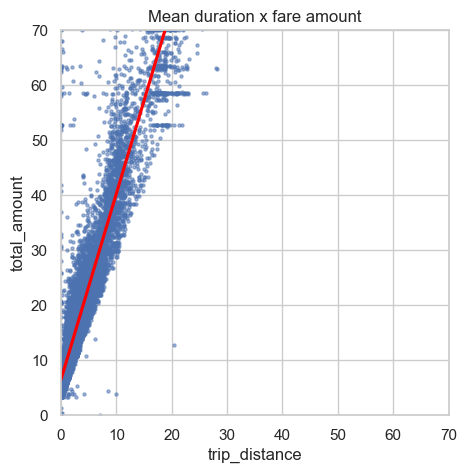

In [48]:
#create a scatter plot of fare amount and trip distance 
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df1['trip_distance'], y=df1['total_amount'],
           scatter_kws ={'alpha':0.5, 's':5},
           line_kws ={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

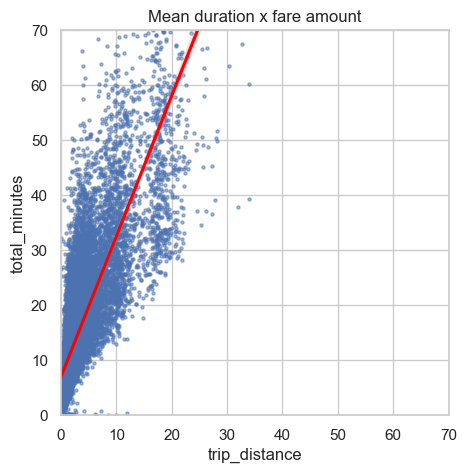

In [49]:
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df1['trip_distance'], y=df1['total_minutes'],
           scatter_kws ={'alpha':0.5, 's':5},
           line_kws ={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

<Figure size 800x800 with 0 Axes>

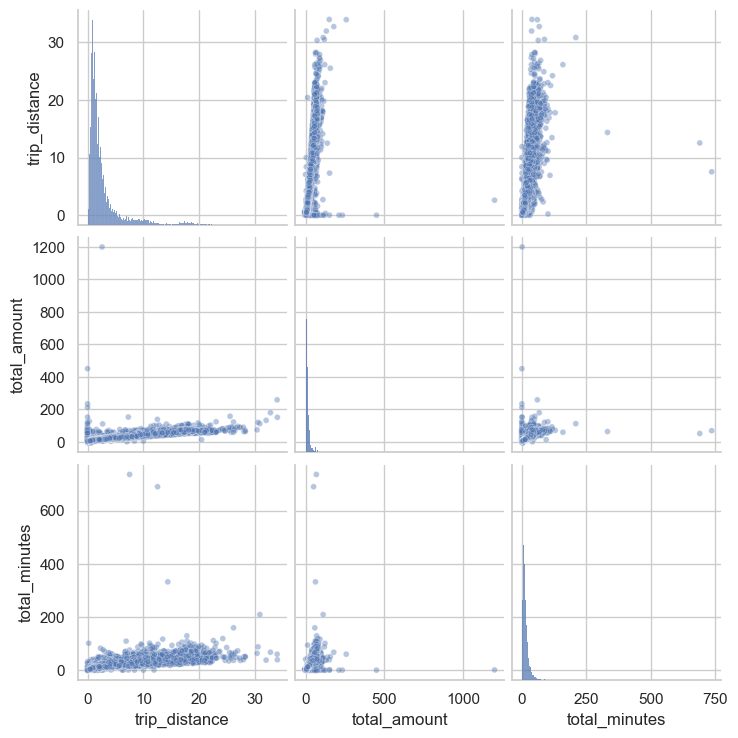

In [55]:
plt.figure(figsize=(8,8))
sns.pairplot(df1, plot_kws={'alpha': 0.4, 'size': 5})

In [58]:
df.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'total_minutes'], dtype='object')

Text(0.5, 1.0, 'correlation heatmap')

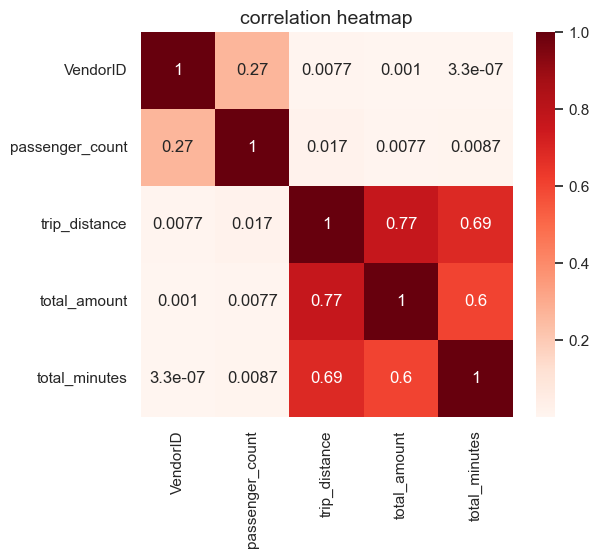

In [68]:
df2 = df[['VendorID', 'passenger_count','trip_distance','total_amount','total_minutes']]
plt.figure(figsize=(6,5))
sns.heatmap(df2.corr(method='pearson'), annot = True, cmap = 'Reds')
plt.title('correlation heatmap', fontsize =14)

In [70]:
df1.dtypes

trip_distance    float64
total_amount     float64
total_minutes    float64
dtype: object

# Course 4  Statistical analysis

### T Hypothesis testing
Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger fare amount than customers who pay in cash. However, this difference might arise from random sampling, rather than being a true difference in fare amount. To assess whether the difference is statistically significant, you conduct a hypothesis test.

In [ ]:
#hypothesis test, A/B test
#significance level

credit_card = taxi_data[taxi_data['payment_type'] == 1]['fare_amount']
cash = taxi_data[taxi_data['payment_type'] == 2]['fare_amount']
stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

# Course 5 Build regression models
Automatidata is near the end of the TLC project. The following tasks are needed at this stage of the project:
* Determine the correct modeling approach
* Build a regression model
* Finish checking model assumptions
* Evaluate the model
* Interpret model results and summarize findings for stakeholders within TLC

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [75]:
# i only use these three variables 'trip_distance','total_amount','total_minutes' to buld regression models 
#split the data 
x = df1[['trip_distance','total_minutes']]
y = df1[['total_amount']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [77]:
print('the train data size:', x_train.shape)
print('the test data size:', x_test.shape)

the train data size: (18124, 2)
the test data size: (4531, 2)


In [76]:
#standardize the x variable 
x_train_scaled = StandardScaler().fit(x_train).transform(x_train)
print(x_train_scaled)

[[-0.1154877  -0.14303975]
 [ 1.86140785  0.16010804]
 [-0.38629531 -0.53777082]
 ...
 [-0.06132618  1.2072813 ]
 [ 4.02786872  0.96234925]
 [ 0.34217716  0.29996779]]


In [79]:
#fit the model 
Lr = LinearRegression()
Lr.fit(x_train_scaled, y_train)

LinearRegression()

In [96]:
print('intercept:',Lr.intercept_)
print('coefficient:',Lr.coef_)
print(f'The formula for this Linear regression is: y = {Lr.coef_[0][0]}*ditance + {Lr.coef_[0][1]}*minutes + {Lr.intercept_}')

intercept: [16.36410505]
coefficient: [[10.97102691  2.22908348]]
The formula for this Linear regression is: y = 10.971026906844259*ditance + 2.2290834804529167*minutes + [16.36410505]


In [107]:
coefficients = pd.DataFrame(Lr.coef_, columns=x.columns)
coefficients

,trip_distance,total_minutes
0,10.971027,2.229083


#### Evaluate data: test train/test data respectively
Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [101]:
#evaluate the model on the train data
y_pred=Lr.predict(x_train_scaled)
print('Coefficient of determination:', Lr.score(x_train_scaled, y_train))
print('R^2:',r2_score(y_train, y_pred))
print('MAE:',mean_absolute_error(y_train, y_pred))
print('MSE:', mean_squared_error(y_train, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred)))

Coefficient of determination: 0.5653173102228595
R^2: 0.5653173102228595
MAE: 2.4343742748003243
MSE: 121.56374632270246
RMSE: 11.025595055265835


In [103]:
#test data
x_test_scaled = StandardScaler().fit(x_test).transform(x_test)

In [104]:
#evaluate the model on the test data 
y_test_pred=Lr.predict(x_test_scaled)
print('Coefficient of determination:', Lr.score(x_test_scaled, y_test))
print('R^2:',r2_score(y_test, y_test_pred))
print('MAE:',mean_absolute_error(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Coefficient of determination: 0.8262267256261162
R^2: 0.8262267256261162
MAE: 2.2193333165934837
MSE: 30.208287864855723
RMSE: 5.496206679597822


In [105]:
#result 
results = pd.DataFrame(data={'actual':y_test['total_amount'],
                            'predict':y_test_pred.ravel()})
results['residual']= results['actual']-results['predict']
results.head(20)

,actual,predict,residual
8295,10.56,11.463229,-0.903229
22000,10.30,11.290508,-0.990508
11811,31.60,34.636629,-3.036629
15675,18.30,23.965780,-5.665780
6771,8.30,9.858897,-1.558897
6114,9.36,9.216897,0.143103
2414,7.80,10.559132,-2.759132
6927,7.80,8.455084,-0.655084
11647,17.16,17.137711,0.022289
19140,7.80,9.711972,-1.911972


Text(0.5, 1.0, 'actual vs. predicted')

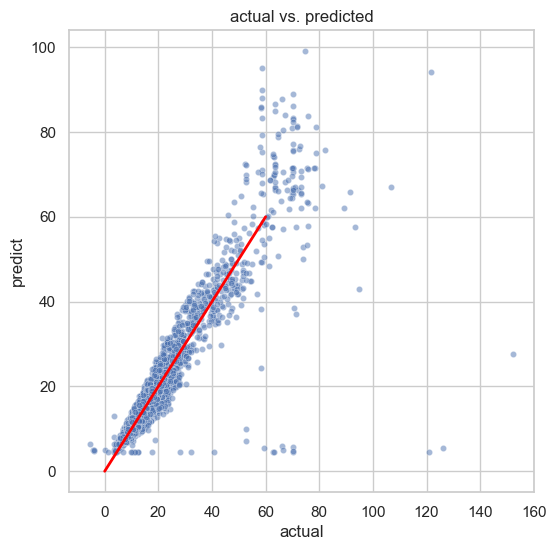

In [112]:
#visualize model result
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style = 'whitegrid')
sns.scatterplot(x='actual',
               y='predict',
               data = results,
               s=20,
               alpha=0.5,
               ax=ax)
plt.plot([0,60],[0,60], c='red', linewidth=2)
plt.title('actual vs. predicted')

#### Check the assumptions 
1. linearity
2. independent observations
3. normality
4. homoscedasticity

Text(0, 0.5, 'residual count')

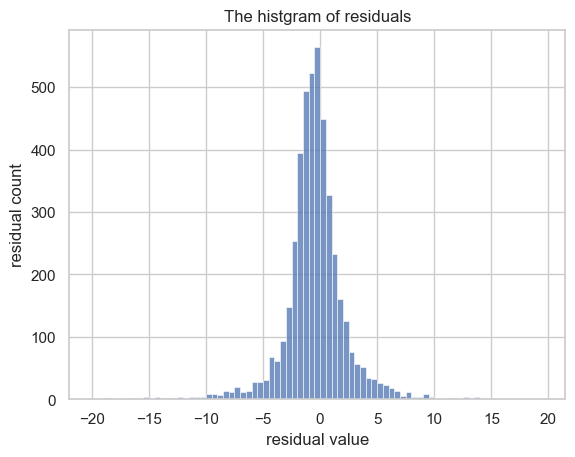

In [118]:
sns.histplot(results['residual'], bins=np.arange(-20,20,0.5))
plt.title('The histgram of residuals')
plt.xlabel('residual value')
plt.ylabel('residual count')

In [ ]:
# another way to check normality
# Create a 1x2 plot figure.
import statsmodels.api as sm

fig, axes = plt.subplots(1, 2, figsize = (8,4))
sns.histplot(results['residual'], ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.
sm.qqplot(results['residual'], line='s',ax = axes[1])
axes[1].set_title("Normal Q-Q plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

plt.show()

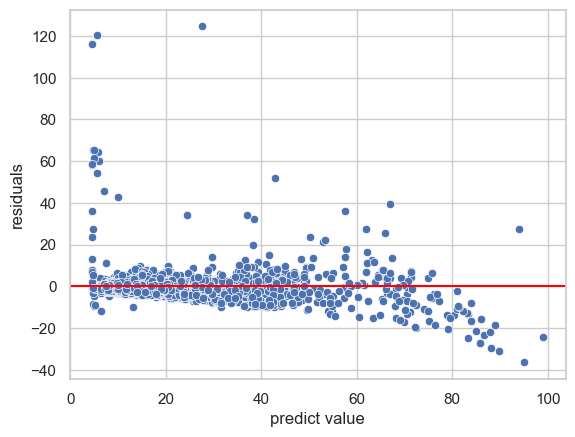

In [119]:
#homoscedasticity, create the fitted values and residuals
#if the plot resembles a random cloud, then the assumption is likely met 
fig = sns.scatterplot(x=results['predict'], y = results['residual'])
fig.axhline(0,c='red')
fig.set_xlabel('predict value')
fig.set_ylabel('residuals')

plt.show()

#### Bonus:check performance on full dataset

In [124]:
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)
y_full_pred =Lr.predict(x_scaled)

In [126]:
print('R^2:', r2_score(y, y_full_pred))
print('MAE:', mean_absolute_error(y, y_full_pred))
print('MSE:', mean_squared_error(y, y_full_pred))
print('RMSE:', np.sqrt(mean_squared_error(y, y_full_pred)))

R^2: 0.6006452963617557
MAE: 2.3886887779966064
MSE: 103.23555811106459
RMSE: 10.160490052702409


###  Use OLS to do linear models 
OLS stands for "Ordinary Least Squares." It is a statistical method used in regression analysis to estimate the parameters (coefficients) of a linear regression model. The goal of OLS is to find the line (or hyperplane in multiple dimensions) that minimizes the sum of the squared vertical distances (residuals) between the observed data points and the predicted values from the regression model.

In [128]:
pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 45.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 38.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [129]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [132]:
df1.columns

Index(['trip_distance', 'total_amount', 'total_minutes'], dtype='object')

In [134]:
ols_formula = 'total_amount ~ C(trip_distance) + total_minutes'

OLS = ols(formula = ols_formula, data=df1)
model = OLS.fit()

In [ ]:
model.summary()

# Course 6 build tree-based models
We can build a model that predicts the most generous customers. This could accomplish the goal of helping taxi drivers increase their earnings from tips while preventing the wrongful exclusion of certain people from using taxis

In [ ]:
#the dataset is too simple, so i choose not to build tree-based models in case of the overfitting

### **Given your efforts, what can you summarize for DeShawn and the data team?**

*Note for Learners: Your notebook should contain data that can address Luana's requests. Which two variables are most helpful for building a predictive model for the client: NYC TLC?*